In [7]:
import numpy as np

In [8]:
import matplotlib.pylab as lab

In [9]:
def split_area(point1 = 0, point2 = 9, N = 10):
    delta = (point2 - point1) / (N - 1)
    points = [(point1 + (delta*i)) for i in range(N)]
    return points

In [10]:
def f(x):
    return (x+1) * np.cos(1/x)

N = 50
M = 250
a = 1
b = (2 * np.pi) + 1

## 1 Разбиение отрезка на N частей

In [11]:
points = split_area(a, b, N)
print(points)

[1.0, 1.1282282715750935, 1.256456543150187, 1.3846848147252808, 1.5129130863003744, 1.6411413578754679, 1.7693696294505616, 1.8975979010256552, 2.0258261726007487, 2.1540544441758422, 2.2822827157509358, 2.4105109873260293, 2.5387392589011233, 2.6669675304762164, 2.7951958020513104, 2.923424073626404, 3.0516523452014974, 3.179880616776591, 3.3081088883516845, 3.436337159926778, 3.5645654315018716, 3.6927937030769655, 3.821021974652059, 3.9492502462271526, 4.077478517802247, 4.20570678937734, 4.333935060952433, 4.462163332527527, 4.590391604102621, 4.718619875677714, 4.846848147252808, 4.975076418827902, 5.103304690402995, 5.231532961978089, 5.359761233553182, 5.487989505128276, 5.616217776703369, 5.744446048278463, 5.872674319853556, 6.00090259142865, 6.129130863003743, 6.257359134578837, 6.385587406153931, 6.513815677729024, 6.642043949304118, 6.770272220879211, 6.898500492454305, 7.026728764029398, 7.154957035604492, 7.283185307179586]


## 2 Значение f(x) в точках разбиения

In [12]:
values = [f(x) for x in points]
print(values)

[1.0806046117362795, 1.3455673474104561, 1.5787294401710963, 1.789378090749528, 1.983676364186413, 2.1658164459056746, 2.3387214172025184, 2.504477379802719, 2.66460510917296, 2.8202348159367565, 2.9722211842923385, 3.1212207686568605, 3.2677451366950088, 3.412198052531912, 3.5549019481549364, 3.696117071829652, 3.8360555441087008, 3.974891816181933, 4.112770549105338, 4.249812618838521, 4.386119742095036, 4.521778075324831, 4.656861040769746, 4.791431564790024, 4.925543865019346, 5.059244888082914, 5.192575474406022, 5.325571308204025, 5.458263697128086, 5.590680215891369, 5.722845240569065, 5.854780394480525, 5.986504922142181, 6.118036004378519, 6.249389025042297, 6.3805777977387494, 6.51161475933396, 6.642511135752519, 6.773277084556669, 6.903921817990284, 7.034453709521514, 7.164880386394043, 7.295208810272018, 7.42544534771785, 7.555595831959084, 7.685665617168088, 7.815659626286701, 7.945582393269179, 8.075438100485025, 8.205230611913178]


## 3 Интеграл методом прямоугольников (левых)

In [15]:
def rectangle_integral(points, values):
    delta = points[1] - points[0]
    integral_value = sum([val * delta for val in values[:-1]])
    return integral_value

In [22]:
rect_integral_value = rectangle_integral(points, values)

In [23]:
rect_integral_value

30.456676942166553

## 4 Интеграл методом трапеций

In [20]:
def trapezoidal_integral(points, values):
    delta = points[1] - points[0]
    integral_value = [
        ((values[i] + values[i+1])/2) * delta 
        for i in range(len(points) - 1)
    ]
    return sum(integral_value)

In [24]:
trapezoidal_integral_value = trapezoidal_integral(points, values)

In [25]:
trapezoidal_integral_value

30.913466180977373

## 5 Интеграл методом Симпсона

In [37]:
def simpson_integral(points, values):
    delta = points[1] - points[0]
    integral_tmp = [
        values[i] * (1 if i == 0 or i == (len(points) - 1) else 4 if i % 2 == 1 else 2) for i in range(len(points))]
    integral_value = sum(integral_tmp)
    return integral_value * (delta/3)

In [38]:
simpson_integral_value = simpson_integral(points, values)

In [39]:
simpson_integral_value

30.56716975294926

## 5 Выведение таблицы

## \* Графики \*

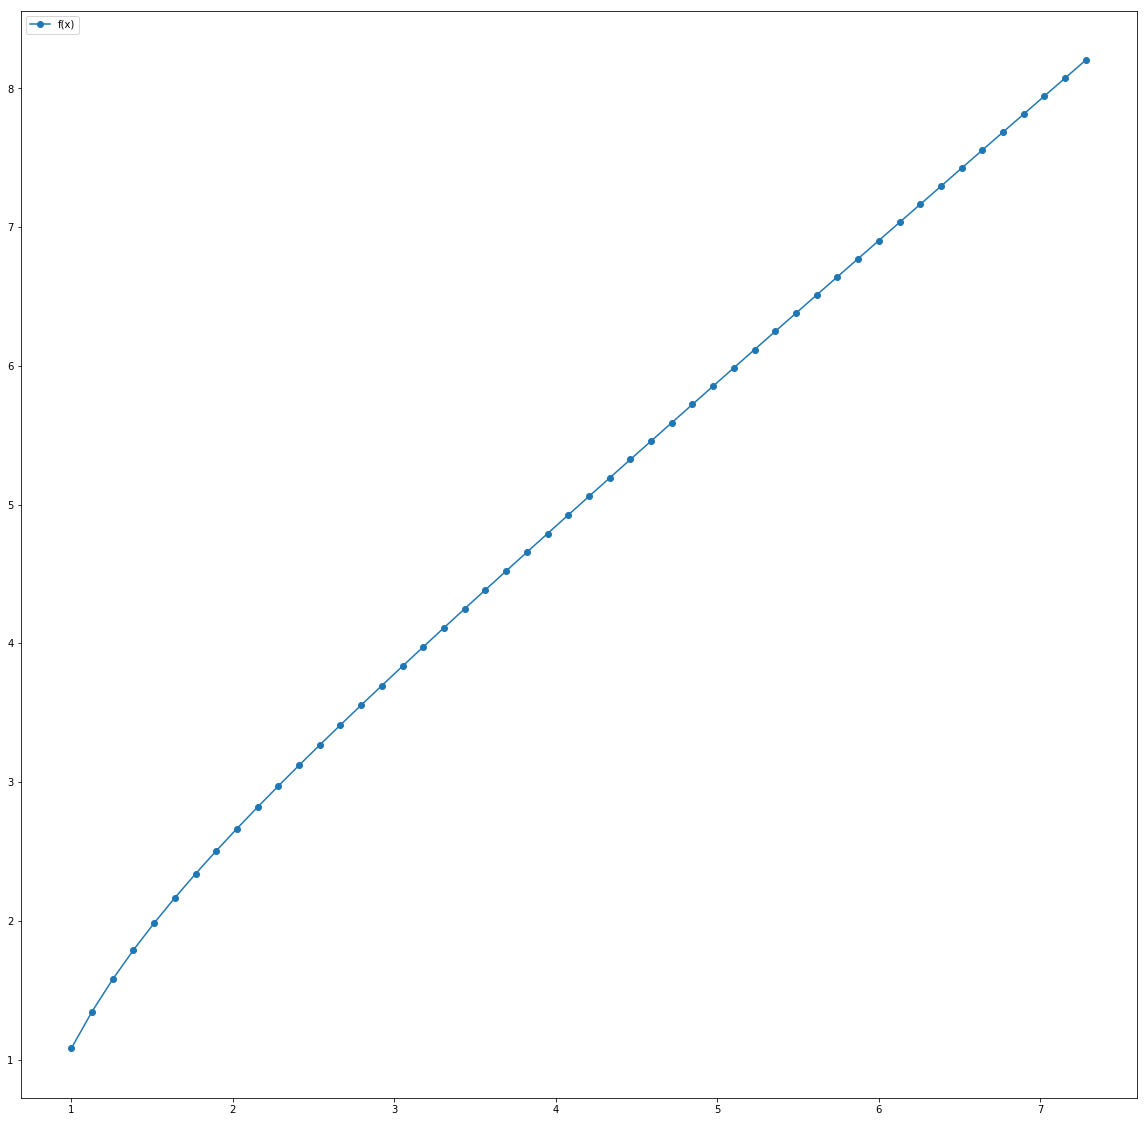

In [44]:
lab.figure(figsize=(20, 20))
lab.plot(points, values, 'o-')
lab.legend(['f(x)'], loc='upper left')